In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
%matplotlib notebook


In [2]:
#external axcess
#cookies=dict(_oauth2_proxy=open(os.environ.get('HOME')+'/.oda-api-token').read().strip())
#disp=DispatcherAPI(host='analyse-staging-1.1.reproducible.online/dispatch-data',instrument='mock',cookies=cookies,protocol='https')

#internal
disp=DispatcherAPI(host='cdcicn01.isdc.unige.ch:32003/dispatch-data',instrument='mock')

#cdicweb01
#disp=DispatcherAPI(host='10.194.169.161',port=32784,instrument='mock')

#local
#disp=DispatcherAPI(host='0.0.0.0',port=5000,instrument='mock')
 

In [3]:
instr_list=disp.get_instruments_list()
for i in instr_list:
    print (i)

isgri
jemx
polar


### get the description of the instrument

In [4]:
disp.get_instrument_description('isgri')


--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 

--------------
query_name: isgri_spectrum_query
 product_name: isgri_spectrum

----

### get the description of the product


In [5]:
disp.get_product_description(instrument='isgri',product_name='isgri_image')

--------------
parameters for  product isgri_image and instrument isgri

--------------
instrumet: isgri

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: isgri_parameters
 name: user_catalog,  value: None,  units: str, 
 name: scw_list,  value: [],  units: names_list, 
 name: radius,  value: 5.0,  units: deg, 
 name: max_pointings,  value: 50,  units: None, 
 name: E1_keV,  value: 10.0,  units: keV, 
 name: E2_keV,  value: 40.0,  units: keV, 
 name: osa_version,  value: None,  units: str, 

--------------
query_name: isgri_image_query
 product_name: isgri_image
 name: detection_threshold,  value: 0.0,  units: sigma, 
 name: image_scale_min,  value: None,  units: None, 
 name: image_scale_max,  value: None,  units: None, 


### check query before submission
we pass 'dry_run' to check if the request is correct without actually submitting it

In [6]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      osa_version='OSA10.2',
                      RA='a',
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real',
                      dry_run=True)

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data


query failed!
Remote server message:-> failed: setting form parameters
Remote server error_message-> ValueError(u"Invalid character at col 0 in angle u'a'",)
Remote server debug_message-> 


RemoteException: Remote analysis exception

### get the product
now we skip the dry_run to actually get the products

In [7]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:15.0',
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data


query done succesfully!


### the ODA data structure

In [8]:
data=data[0]
data.show()

------------------------------
name: mosaic_image
meta_data ['src_name', 'instrument', 'product', 'query_parameters']
number of data units 1
------------------------------
data uniti 0 ,name: ISGR-MOSA-IMA


In [9]:
data.show_meta()

------------------------------
src_name : 
instrument : isgri
product : mosaic
query_parameters : [{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"units": "sigma", "name": "detection_threshold", "value": "5.0"}, {"units": null, "name": "image_scale_min", "value": null}, {"units": null, "name": "image_scale_max", "value": null}]
------------------------------


In [10]:
data.data_unit[0].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
hdu=data.to_fits_hdu_list()

In [12]:
data.data_unit[0].data.shape

(455, 455)

In [13]:
data.write_fits_file('test.fits',overwrite=True)

### the ODA Image   plotting tool

In [14]:
%matplotlib notebook
im=OdaImage(data)

<IPython.core.display.Javascript object>


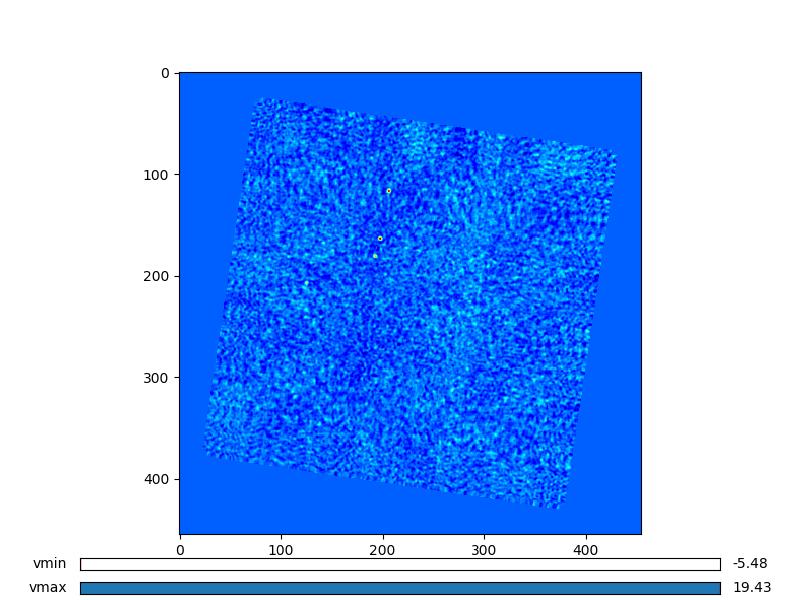

In [15]:
im.show()

In [16]:
data.data_unit[0].header

{u'BASETYPE': u'DAL_ARRAY',
 u'BITPIX': -32,
 u'BSCALE': 1,
 u'BUNIT': u'no units',
 u'BZERO': 0,
 u'CD1_1': -0.0822862539155913,
 u'CD1_2': 0.0,
 u'CD2_1': 0.0,
 u'CD2_2': 0.0822862539155913,
 u'CHANMAX': 40,
 u'CHANMIN': 20,
 u'CHANTYPE': u'PI',
 u'CHECKSUM': u'gESDiCPCgCPCgCPC',
 u'COMMENT': u'STAMP :',
 u'CONFIGUR': u'latest_osa_sw_2015-11-10T03:50:02',
 u'CREATOR': u'ii_skyimage 5.4.4',
 u'CRPIX1': 228.0,
 u'CRPIX2': 228.0,
 u'CRVAL1': 252.939376831055,
 u'CRVAL2': -32.649772644043,
 u'CTYPE1': u'RA---TAN',
 u'CTYPE2': u'DEC--TAN',
 u'CUNIT1': u'deg',
 u'CUNIT2': u'deg',
 u'DATASUM': u'3562348081',
 u'DATE': u'2018-12-14T10:42:40',
 u'DATE-END': u'2003-03-15T23:57:39',
 u'DATE-OBS': u'2003-03-15T23:27:53',
 u'DEADC': 0.775885283090927,
 u'DETNAM': u'ISGRI',
 u'EQUINOX': 2000.0,
 u'EXTNAME': u'ISGR-MOSA-IMA',
 u'EXTREL': u'7.4',
 u'EXTVER': 3,
 u'E_MAX': 40.0,
 u'E_MEAN': 30.0,
 u'E_MIN': 20.0,
 u'GCOUNT': 1,
 u'GRPID1': 1,
 u'HDUCLAS1': u'IMAGE',
 u'HDUCLASS': u'OGIP',
 u'HDUDOC':

### the ODA LC  plotting tool

In [16]:
data=disp.get_product(instrument='isgri',
                      product='isgri_lc',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=70,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real')

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data


query done succesfully!


In [17]:
d=data[5]

In [18]:
d.meta_data

{'rate': 'RATE',
 'rate_err': 'ERROR',
 'src_name': 'IGR J17586-2129',
 'time': 'TIME',
 'time_bin': 0.000810143479094966}

In [19]:
for s in data:
    print (s.meta_data)

{'src_name': 'GX 349+2', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17285-2922', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'AX J1700.2-4220', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17507-2856', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17508-3219', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'IGR J17586-2129', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'OAO 1657-415', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': 'GRO J1719-24', 'rate': 'RATE', 'time_bin': 0.000810143479094966, 'rate_err': 'ERROR', 'time': 'TIME'}
{'src_name': '4U 1735-444', 'rate': 'RATE', 'time_bin': 0.000

In [20]:
lc=data[0]
lc.data_unit[1].data

array([(1169.97924981, 198.35461, 437.45297 , 2.560371 , 16.756752 , 6.457998 , 0.9999995),
       (1169.98006   , 193.66727, 126.646324, 2.4612792, 26.851568 , 6.381221 , 0.9999995),
       (1169.98087017, 165.48798, 106.67175 , 2.2341907, 30.112095 , 5.7995043, 0.9999995),
       (1169.98168037, 170.36319, 110.04073 , 2.2748673, 24.547153 , 5.9050727, 0.9999995),
       (1169.98249057, 179.08556, 114.907425, 2.319844 , 19.534487 , 6.0552273, 0.9999995),
       (1169.98330074, 170.404  , 113.80614 , 2.2976866, 35.34908  , 5.917109 , 0.9999995),
       (1169.98411092, 177.87416, 112.59515 , 2.3153915, 46.75426  , 6.0594788, 0.9999995),
       (1169.98492112, 170.02942, 107.77012 , 2.3239565, 44.09943  , 5.904361 , 0.9999995),
       (1169.9857313 , 169.3733 , 108.96758 , 2.294586 , 38.917126 , 5.8867855, 0.9999995),
       (1169.98654149, 164.62074, 105.818214, 2.196995 , 41.819798 , 5.79285  , 0.9999995),
       (1169.98735168, 160.1174 , 100.87292 , 2.2091596, 19.254423 , 5.7093225, 

In [21]:
lc.show()

------------------------------
name: isgri_lc
meta_data ['src_name', 'rate', 'time_bin', 'rate_err', 'time']
number of data units 2
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: ISGR-SRC.-LCR


In [22]:
lc.meta_data

{'rate': 'RATE',
 'rate_err': 'ERROR',
 'src_name': 'GX 349+2',
 'time': 'TIME',
 'time_bin': 0.000810143479094966}

<IPython.core.display.Javascript object>


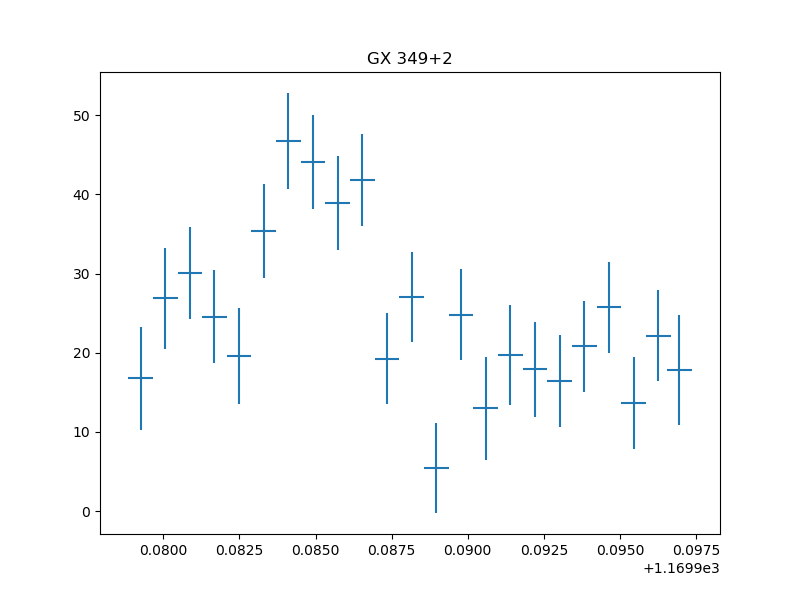

In [23]:
OdaLightCurve(lc).show(unit_ID=1)

In [25]:
lc.data_unit[0].header

{u'BITPIX': 8, u'EXTEND': True, u'NAXIS': 0, u'SIMPLE': True}

### Polar LC

In [24]:
#conda create --name=polar_root root=5 python=3 -c nlesc
#source activate poloar_root
#conda install astropy future -c nlesc
#conda install -c conda-forge json_tricks
#from oda_api.api import DispatcherAPI
#from oda_api.data_products import BinaryData
#from oda_api.plot_tools import OdaImage,OdaLightCurve
#disp=DispatcherAPI(host='10.194.169.161',port=32784,instrument='mock',protocol='http')
data=disp.get_product(instrument='polar',product='polar_lc',T1='2016-12-18T08:32:21.000',T2='2016-12-18T08:34:01.000',time_bin=0.5,verbose=True,dry_run=False)

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data


query done succesfully!


In [25]:
lc=data[0]
root=data[1]
open('lc.root', "wb").write(root)

In [26]:
 open('lc.root', "wb").write(root)

<IPython.core.display.Javascript object>


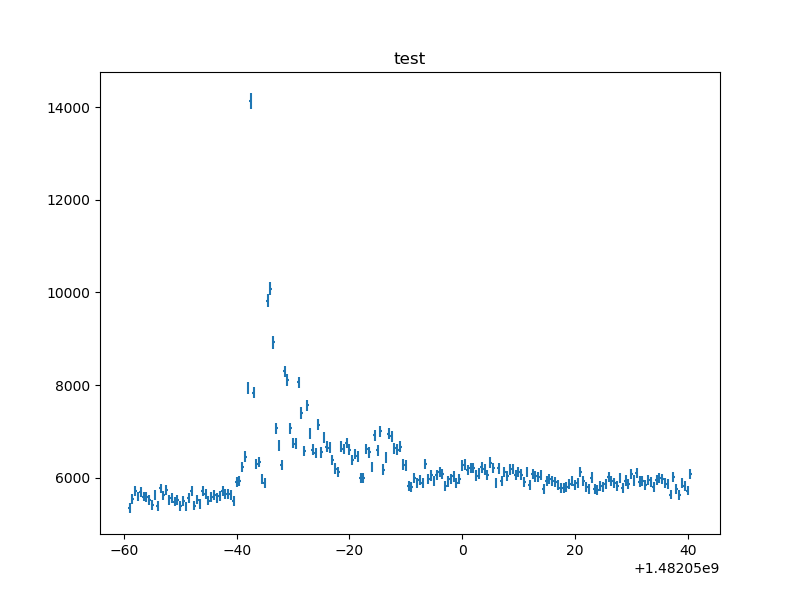

In [27]:
OdaLightCurve(lc).show(unit_ID=0)

### the ODA  and spectra

In [28]:
data=disp.get_product(instrument='isgri',
                      product='isgri_spectrum',
                      T1='2003-03-15T23:27:40.0',
                      T2='2003-03-16T00:03:12.0',
                      time_bin=50,
                      osa_version='OSA10.2',
                      RA=255.986542,
                      DEC=-37.844167,
                      detection_threshold=5.0,
                      radius=15.,
                      product_type='Real' )

waiting for remote response, please wait run_analysis http://cdcicn01.isdc.unige.ch:32003/dispatch-data


query done succesfully!


In [29]:
for ID,s in enumerate(data):
    print (ID,s.meta_data)

(0, {'src_name': 'GX 349+2', 'product': 'isgri_spectrum'})
(1, {'src_name': 'GX 349+2', 'product': 'isgri_arf'})
(2, {'src_name': 'GX 349+2', 'product': 'isgri_rmf'})
(3, {'src_name': 'IGR J17285-2922', 'product': 'isgri_spectrum'})
(4, {'src_name': 'IGR J17285-2922', 'product': 'isgri_arf'})
(5, {'src_name': 'IGR J17285-2922', 'product': 'isgri_rmf'})
(6, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_spectrum'})
(7, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_arf'})
(8, {'src_name': 'AX J1700.2-4220', 'product': 'isgri_rmf'})
(9, {'src_name': 'IGR J17507-2856', 'product': 'isgri_spectrum'})
(10, {'src_name': 'IGR J17507-2856', 'product': 'isgri_arf'})
(11, {'src_name': 'IGR J17507-2856', 'product': 'isgri_rmf'})
(12, {'src_name': 'IGR J17508-3219', 'product': 'isgri_spectrum'})
(13, {'src_name': 'IGR J17508-3219', 'product': 'isgri_arf'})
(14, {'src_name': 'IGR J17508-3219', 'product': 'isgri_rmf'})
(15, {'src_name': 'IGR J17586-2129', 'product': 'isgri_spectrum'})
(16, {'sr

In [30]:
data[87].write_fits_file('spec.fits')
data[88].write_fits_file('arf.fits')
data[89].write_fits_file('rmf.fits')


In [31]:
s.show()

------------------------------
name: 
meta_data ['src_name', 'product']
number of data units 4
------------------------------
data uniti 0 ,name: PRIMARY
data uniti 1 ,name: GROUPING
data uniti 2 ,name: ISGR-RMF.-RSP
data uniti 3 ,name: ISGR-EBDS-MOD


In [32]:
d=data[3]

In [33]:
d.data_unit[1].header

{u'ANCRFILE': u'NONE',
 u'AREASCAL': 1,
 u'BACKFILE': u'NONE',
 u'BACKSCAL': 1,
 u'BASETYPE': u'DAL_TABLE',
 u'BITPIX': 8,
 u'BKGPARAM': u'rebinned_back_spe.fits',
 u'CHANTYPE': u'PI',
 u'CHECKSUM': u'oKaFoJWEoJaEoJUE',
 u'COMMENT': u'  on the next keyword which has the name CONTINUE.',
 u'CONFIGUR': u'latest_osa_sw_2015-11-10T03:50:02',
 u'CORRFILE': u'NONE',
 u'CORRSCAL': 0,
 u'CREATOR': u'ISGRISpectraSum.v5.4.2.extractall',
 u'DATASUM': u'3507849637',
 u'DATE': u'2018-12-14T13:50:24.083597',
 u'DEADC': 0.775885283090927,
 u'DEC_OBJ': -29.3624725341797,
 u'DETCHANS': 62,
 u'DETNAM': u'ISGRI',
 u'EQUINOX': 2000.0,
 u'EXPOSURE': 1198.97207125461,
 u'EXP_SRC': 417.510009765625,
 u'EXTNAME': u'ISGR-EVTS-SPE',
 u'EXTREL': u'10.4',
 u'EXTVER': 13,
 u'FILTER': u'none',
 u'FITTYPE': 6,
 u'GCOUNT': 1,
 u'GRPID1': 1,
 u'HDUCLAS1': u'SPECTRUM',
 u'HDUCLAS2': u'TOTAL',
 u'HDUCLAS3': u'RATE',
 u'HDUCLASS': u'OGIP',
 u'HDUVERS': u'1.2.1',
 u'INSTRUME': u'IBIS',
 u'ISDCLEVL': u'SPE',
 u'LONGSTRN': 

### spectral fitting with threeML

In [38]:
from threeML.plugins.OGIPLike import  OGIPLike
from threeML.io.package_data import get_path_of_data_file
from threeML import *
warnings.filterwarnings('ignore')


In [39]:

ogip_data = OGIPLike('ogip',
                     observation='spec.fits',
                     arf_file= 'arf.fits' ,
                     response= 'rmf.fits')

Auto-probed noise models:
- observation: gaussian
- background: None


In [40]:
ogip_data.set_active_measurements('20-60')


Range 20-60 translates to channels 7-24
Now using 18 channels out of 62


In [41]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


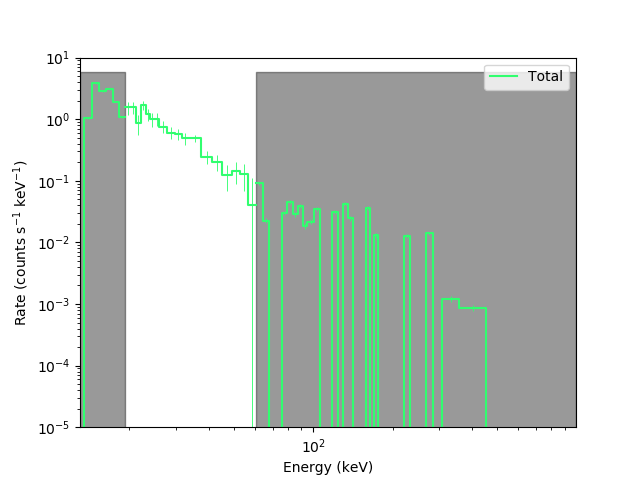

bad channels shown in red hatching



(1e-05, 10)

In [42]:
ogip_data.view_count_spectrum()
plt.ylim(1E-5,10)


In [45]:

fit_function = Cutoff_powerlaw()

# define the point source
point_source = PointSource('ps', 0, 0, spectral_shape=fit_function)

#define the model
model = Model(point_source)

# create a data list
datalist = DataList(ogip_data)

# make the joint likelihood
jl = JointLikelihood(model, datalist)

#fit
jl.fit();

Best fit values:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(2.3 -1.1 +2.0) x 10^-3,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(5.3 +/- 2.5) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,9.8 -1.0 +1.1,keV



Correlation matrix:



1.00,-0.93,0.49
-0.93,1.00,-0.76
0.49,-0.76,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
ogip,5.24134
total,5.24134



Values of statistical measures:



,statistical measures
AIC,18.196966
BIC,19.153796


<IPython.core.display.Javascript object>


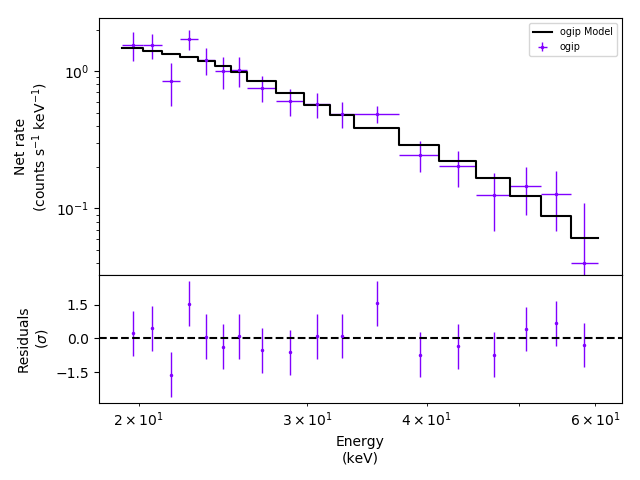

In [46]:
display_spectrum_model_counts(jl, step=True);


<IPython.core.display.Javascript object>


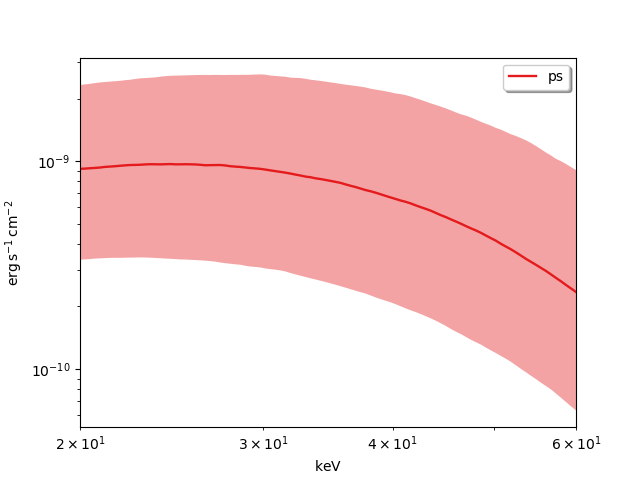

<IPython.core.display.Javascript object>


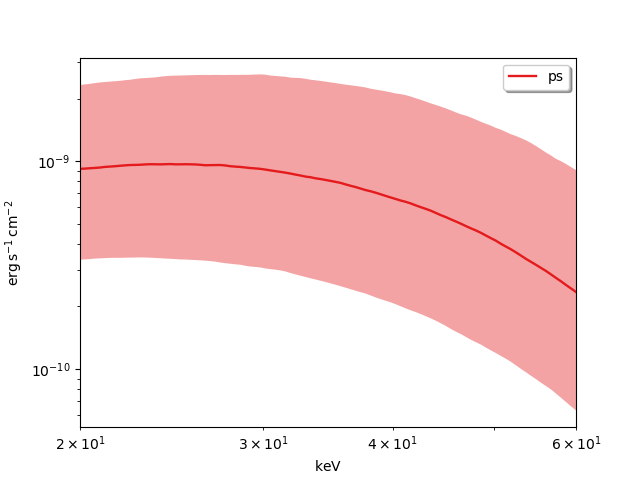

In [47]:
plot_point_source_spectra(jl.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [49]:

# A uniform prior can be defined directly, like:
model.ps.spectrum.main.Cutoff_powerlaw.index.prior = Uniform_prior(lower_bound=-2.,
                                                                     upper_bound=2.)

# or it can be set using the currently defined boundaries
model.ps.spectrum.main.Cutoff_powerlaw.xc.prior=  Uniform_prior(lower_bound=0,
                                                                     upper_bound=100)


# The same for the Log_uniform prior
model.ps.spectrum.main.Cutoff_powerlaw.K.prior = Log_uniform_prior(lower_bound=1e-3,
                                                                     upper_bound=100)


model.display()

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (3):
--------------------

                                             value min_value max_value  \
ps.spectrum.main.Cutoff_powerlaw.K      0.00230365     1e-30      1000   
ps.spectrum.main.Cutoff_powerlaw.index    0.531183       -10        10   
ps.spectrum.main.Cutoff_powerlaw.xc         9.7834      None      None   

                                                  unit  
ps.spectrum.main.Cutoff_powerlaw.K      keV-1 s-1 cm-2  
ps.spectrum.main.Cutoff_powerlaw.index                  
ps.spectrum.main.Cutoff_powerlaw.xc                keV  

Fixed parameters (4):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

In [50]:
bs = BayesianAnalysis(model, datalist)

# This uses the emcee sampler
samples = bs.sample(n_walkers=30, burn_in=100, n_samples=1000)


Mean acceptance fraction: 0.3351333333333333

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(1.2 -1.0 +0.7) x 10^-2,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(1 +/- 5) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.19 +/- 0.22) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.344585
total,-2.344585



Values of statistical measures:



,statistical measures
AIC,12.403456
BIC,13.360285
DIC,-275.177786
PDIC,-283.443562


In [51]:
bs.results.display()

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
ps.spectrum.main.Cutoff_powerlaw.K,(1.2 -1.0 +0.7) x 10^-2,1 / (cm2 keV s)
ps.spectrum.main.Cutoff_powerlaw.index,(1 +/- 5) x 10^-1,
ps.spectrum.main.Cutoff_powerlaw.xc,(1.19 +/- 0.22) x 10,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
ogip,-2.344585
total,-2.344585



Values of statistical measures:



,statistical measures
AIC,12.403456
BIC,13.360285
DIC,-275.177786
PDIC,-283.443562


<IPython.core.display.Javascript object>


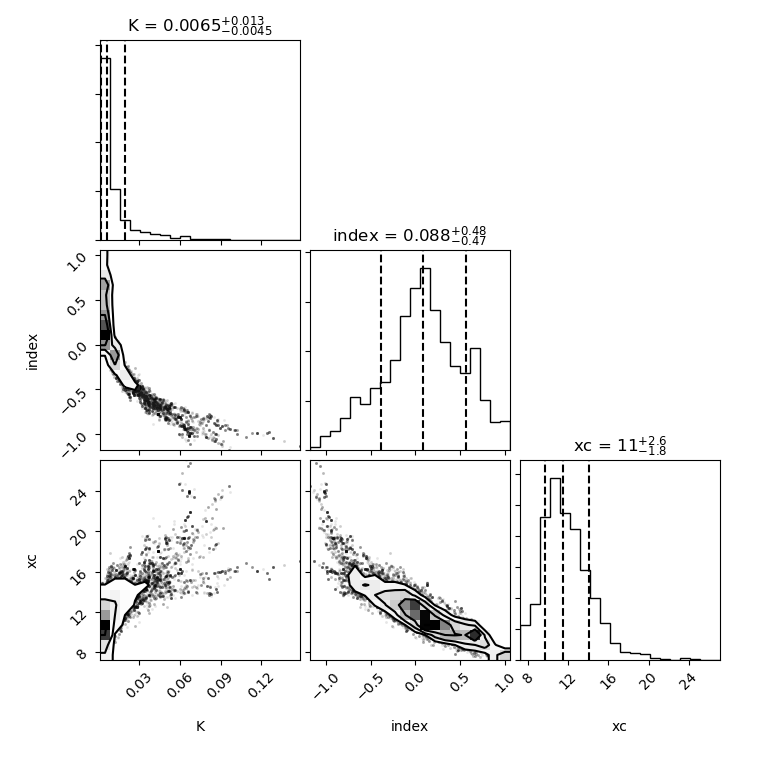

<IPython.core.display.Javascript object>


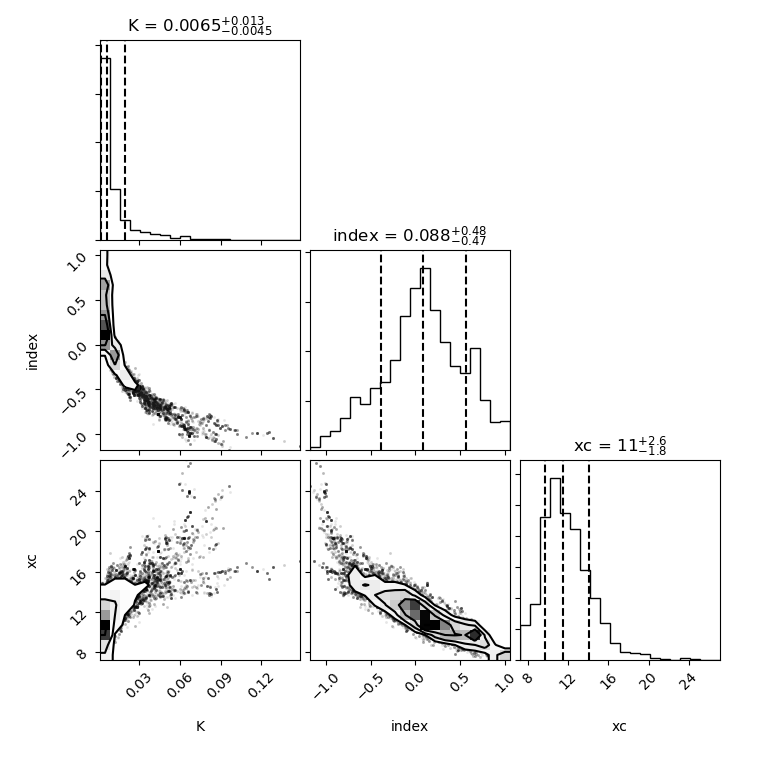

In [52]:
bs.results.corner_plot()

In [ ]:
plot_point_source_spectra(bs.results, ene_min=20, ene_max=60, num_ene=100,
                          flux_unit='erg / (cm2 s)')

In [53]:

fluxes_bs = bs.results.get_point_source_flux(100 * u.keV, 1 * u.MeV)

,flux
ps: total,(0.4 -0.4 +6) x 10^-11 erg / (cm2 s)
